**CNN with data augumentation**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it


In [3]:
data_dir


'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/dandelion/2542908888_25a1c78ff0.jpg'),
 PosixPath('datasets/flower_photos/dandelion/12094442595_297494dba4_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18010259565_d6aae33ca7_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5045509402_6e052ce443.jpg'),
 PosixPath('datasets/flower_photos/dandelion/17175932454_c052e205c1_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]


[PosixPath('datasets/flower_photos/roses/323872063_7264e7e018_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5360769702_ec28c53b9e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2627513944_b1361e60ec_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3494252600_29f26e3ff0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16476788181_0e2ffc719a.jpg')]

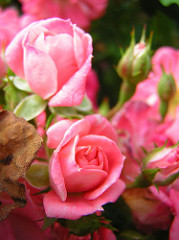

In [8]:
PIL.Image.open(str(roses[0]))


In [9]:
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [11]:
str(flowers_images_dict['roses'][0])


'datasets/flower_photos/roses/323872063_7264e7e018_m.jpg'

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [13]:
cv2.resize(img,(180,180)).shape

#

(180, 180, 3)

In [14]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)


In [16]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [18]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 6s 19ms/step - loss: 1.3184 - accuracy: 0.4571
Epoch 2/30
86/86 [==============================] - 2s 19ms/step - loss: 0.9578 - accuracy: 0.6326
Epoch 3/30
86/86 [==============================] - 2s 19ms/step - loss: 0.7810 - accuracy: 0.7049
Epoch 4/30
86/86 [==============================] - 2s 20ms/step - loss: 0.5772 - accuracy: 0.7896
Epoch 5/30
86/86 [==============================] - 2s 23ms/step - loss: 0.3528 - accuracy: 0.8790
Epoch 6/30
86/86 [==============================] - 2s 21ms/step - loss: 0.1834 - accuracy: 0.9430
Epoch 7/30
86/86 [==============================] - 2s 19ms/step - loss: 0.1286 - accuracy: 0.9633
Epoch 8/30
86/86 [==============================] - 2s 19ms/step - loss: 0.0747 - accuracy: 0.9797
Epoch 9/30
86/86 [==============================] - 2s 19ms/step - loss: 0.0915 - accuracy: 0.9767
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0872 - accuracy: 0.9775
Epoch 11/

In [19]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 1s 17ms/step - loss: 3.4368 - accuracy: 0.6318


[3.4367516040802, 0.6318082809448242]

In [20]:
predictions = model.predict(X_test_scaled)
predictions


29/29 [==============================] - 0s 8ms/step


array([[ -2.8667605 ,  -0.7462185 ,  17.069542  ,  -6.5519133 ,
         -2.0711436 ],
       [  9.4287405 ,  -1.2503276 ,  14.115998  ,  -6.5353775 ,
         -4.3603754 ],
       [ -5.2255154 ,   8.302707  ,  10.5026655 ,   7.6598926 ,
         -0.4168717 ],
       ...,
       [ -0.67973083,  -7.0323873 ,   7.4504876 ,   4.2862496 ,
          9.787272  ],
       [ 22.967516  ,  -0.258554  , -12.429762  , -20.144552  ,
          6.237818  ],
       [  3.7860231 , -12.023388  ,   6.6800685 ,  11.256145  ,
          3.597806  ]], dtype=float32)

In [21]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)


2

In [22]:
y_test[0]


1

# **Here we see that while train accuracy is very high (100%), the test accuracy is significantly low (63.18%) indicating overfitting.Improve Test Accuracy Using Data Augmentation**


In [24]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1),

])


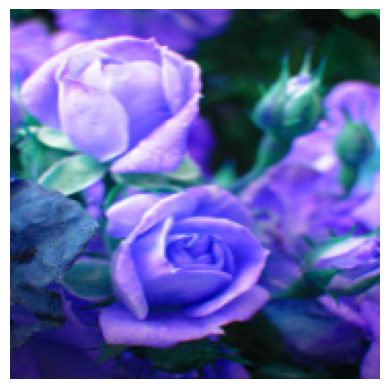

In [25]:
plt.axis('off')
plt.imshow(X[0])

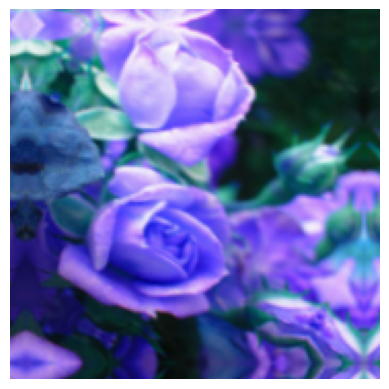

In [26]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


In [27]:
num_classes = 5
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
history = model.fit(X_train_scaled, y_train, epochs=8, validation_data=(X_test_scaled, y_test))


Epoch 1/8
86/86 [==============================] - 7s 46ms/step - loss: 1.3021 - accuracy: 0.4248 - val_loss: 1.2373 - val_accuracy: 0.4956
Epoch 2/8
86/86 [==============================] - 3s 32ms/step - loss: 1.0543 - accuracy: 0.5858 - val_loss: 1.0900 - val_accuracy: 0.5882
Epoch 3/8
86/86 [==============================] - 3s 35ms/step - loss: 0.9781 - accuracy: 0.6195 - val_loss: 0.9939 - val_accuracy: 0.6057
Epoch 4/8
86/86 [==============================] - 3s 30ms/step - loss: 0.8892 - accuracy: 0.6592 - val_loss: 0.9651 - val_accuracy: 0.6427
Epoch 5/8
86/86 [==============================] - 3s 30ms/step - loss: 0.8530 - accuracy: 0.6693 - val_loss: 0.9785 - val_accuracy: 0.6373
Epoch 6/8
86/86 [==============================] - 3s 31ms/step - loss: 0.7960 - accuracy: 0.6911 - val_loss: 0.8369 - val_accuracy: 0.6863
Epoch 7/8
86/86 [==============================] - 3s 34ms/step - loss: 0.7721 - accuracy: 0.7017 - val_loss: 0.7871 - val_accuracy: 0.7135
Epoch 8/8
86/86 [===

In [30]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_acc}")

29/29 [==============================] - 0s 12ms/step - loss: 0.7998 - accuracy: 0.7102
Test accuracy: 0.7102396488189697


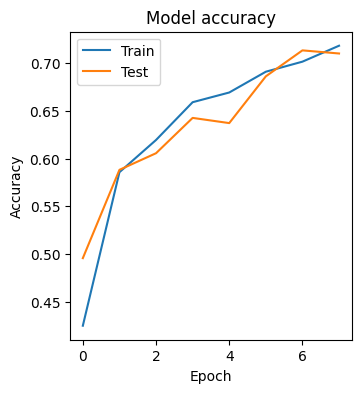

In [31]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

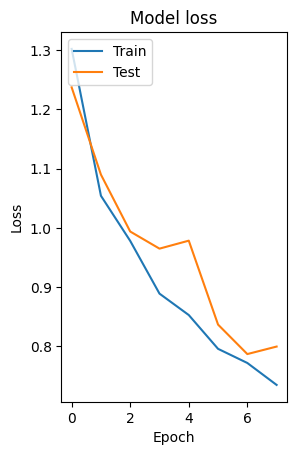

In [32]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()